#### 0.0. IMPORTS

In [62]:
import pandas as pd

import inflection 

import math
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt

from IPython.display      import Image
from IPython.core.display import HTML

##### 0.1 Helper Functions 

In [65]:
def jupyter_settings():
    %matplotlib inline
    
    plt.style.use('bmh')
    plt.rcParams['figure.figsize'] = [12, 8]
    plt.rcParams['font.size'] = 24
    sns.set_palette("Reds") 
    
    display(HTML( '<style>.container { width:100% !important; }</style>'))
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option('display.expand_frame_repr', False)
    
    sns.set()

In [66]:
jupyter_settings()

##### 0.2 Loading Data

In [2]:
df_sales_raw = pd.read_csv('data/train.csv', low_memory=False)
df_store_raw = pd.read_csv('data/store.csv', low_memory=False)

#merge
df_raw = pd.merge(df_sales_raw, df_store_raw, how='left', on='Store')
df_raw.head(3)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"


#### 1.0 DESCRIÇÃO DOS DADOS

In [3]:
df1 = df_raw.copy()

##### 1.1. Rename Columns

In [4]:
df_raw.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

In [5]:
#função que irá formatar as palavras da coluna do dataframe. Eles ficaram todos com letra minusculas e separadas por _
cols_old = ['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo', 'StateHoliday', 
            'SchoolHoliday', 'StoreType', 'Assortment',
            'CompetitionDistance', 'CompetitionOpenSinceMonth',
            'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
            'Promo2SinceYear', 'PromoInterval']

snakecase = lambda x: inflection.underscore(x)

cols_new = list(map(snakecase,cols_old))

In [6]:
df1.columns = cols_new

In [7]:
df1.columns

Index(['store', 'day_of_week', 'date', 'sales', 'customers', 'open', 'promo',
       'state_holiday', 'school_holiday', 'store_type', 'assortment',
       'competition_distance', 'competition_open_since_month',
       'competition_open_since_year', 'promo2', 'promo2_since_week',
       'promo2_since_year', 'promo_interval'],
      dtype='object')

##### 1.2. Data Dimensions

In [8]:
print('N° total de linhas: ', df1.shape[0])
print('N° total de colunas: ', df1.shape[1])

N° total de linhas:  1017209
N° total de colunas:  18


##### 1.3 Data Types

In [9]:
# Verificação do tipo de dados
df1.dtypes

store                             int64
day_of_week                       int64
date                             object
sales                             int64
customers                         int64
open                              int64
promo                             int64
state_holiday                    object
school_holiday                    int64
store_type                       object
assortment                       object
competition_distance            float64
competition_open_since_month    float64
competition_open_since_year     float64
promo2                            int64
promo2_since_week               float64
promo2_since_year               float64
promo_interval                   object
dtype: object

In [10]:
#Convertendo a coluna date de object para datetime
df1.date = pd.to_datetime(df1.date)

In [11]:
#Verificando novamente
df1.dtypes

store                                    int64
day_of_week                              int64
date                            datetime64[ns]
sales                                    int64
customers                                int64
open                                     int64
promo                                    int64
state_holiday                           object
school_holiday                           int64
store_type                              object
assortment                              object
competition_distance                   float64
competition_open_since_month           float64
competition_open_since_year            float64
promo2                                   int64
promo2_since_week                      float64
promo2_since_year                      float64
promo_interval                          object
dtype: object

##### 1.5. Fillout NA

In [12]:
#Verificando os valores vazios
df1.isnull().sum()

store                                0
day_of_week                          0
date                                 0
sales                                0
customers                            0
open                                 0
promo                                0
state_holiday                        0
school_holiday                       0
store_type                           0
assortment                           0
competition_distance              2642
competition_open_since_month    323348
competition_open_since_year     323348
promo2                               0
promo2_since_week               508031
promo2_since_year               508031
promo_interval                  508031
dtype: int64

In [15]:
#competition_distance: 2642
#Metodo: Substituir por um valor muito alto, deixando de ser um competidor próximo
#df1.competition_distance.max()
df1.competition_distance = df1.competition_distance.apply(lambda x:200000.0 if math.isnan(x) else x)

#competition_open_since_month: 323348
#Metodo: vai ser o valor de mes da coluna Date
df1.competition_open_since_month = df1.apply(lambda x:x.date.month if math.isnan(x.competition_open_since_month) else x.competition_open_since_month, axis=1)

#competition_open_since_year: 323348
#Metodo: vai ser o valor de ano da coluna Date
df1.competition_open_since_year = df1.apply(lambda x:x.date.year if math.isnan(x.competition_open_since_year) else x.competition_open_since_year,axis=1)

#promo2_since_week: 508031
#Metodo: vai ser o valor de semana da coluna Date
df1.promo2_since_week = df1.apply(lambda x:x.date.week if math.isnan(x.promo2_since_week) else x.promo2_since_week, axis=1)

#promo2_since_year: 508031
#Metodo: vai ser o valor do ano da coluna Date
df1.promo2_since_year = df1.apply(lambda x:x.date.year if math.isnan(x.promo2_since_year) else x.promo2_since_year, axis=1)

#promo_interval: 508031
#Metodo: 1. criar um dicionario dos meses do ano, 2.preencher os vazios com valor 0, 3. , 4. 
month_map = {1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'Jun',6:'Jul',7:'Aug',8:'Sep',9:'Oct',10:'Nov',11:'Dec'}

df1.promo_interval.fillna(0, inplace=True)

df1['month_map'] = df1.date.dt.month.map(month_map)

df1['is_promo'] = df1[['promo_interval', 'month_map']].apply(lambda x:0 if x['promo_interval'] == 0 else 1 if x['month_map'] in x['promo_interval'].split(',') else 0, axis=1)

In [17]:
df1.sample(5).T

,142340,719524,896624,336287,632567
store,736,20,950,956,33
day_of_week,4,2,5,2,3
date,2015-03-26 00:00:00,2013-09-24 00:00:00,2013-04-19 00:00:00,2014-09-16 00:00:00,2013-12-11 00:00:00
sales,4515,8089,4752,4576,7542
customers,463,903,556,603,776
open,1,1,1,1,1
promo,0,1,0,1,0
state_holiday,0,0,0,0,0
school_holiday,0,0,0,0,0
store_type,c,d,a,a,a


##### 1.6. Change Types

In [18]:
df1.dtypes

store                                    int64
day_of_week                              int64
date                            datetime64[ns]
sales                                    int64
customers                                int64
open                                     int64
promo                                    int64
state_holiday                           object
school_holiday                           int64
store_type                              object
assortment                              object
competition_distance                   float64
competition_open_since_month           float64
competition_open_since_year            float64
promo2                                   int64
promo2_since_week                      float64
promo2_since_year                      float64
promo_interval                          object
month_map                               object
is_promo                                 int64
dtype: object

In [41]:
df1.competition_open_since_month = df1.competition_open_since_month.astype('int64')
df1.competition_open_since_year = df1.competition_open_since_year.astype('int64')

df1.promo2_since_week = df1.promo2_since_week.astype('int64')
df1.promo2_since_year = df1.promo2_since_year.astype('int64')

In [46]:
#As vezes por limitação de memoria, quando roda o codigo ".astype(int)", o que era pra ser int64 fica como int32, verifique:
df1.dtypes

store                                    int64
day_of_week                              int64
date                            datetime64[ns]
sales                                    int64
customers                                int64
open                                     int64
promo                                    int64
state_holiday                           object
school_holiday                           int64
store_type                              object
assortment                              object
competition_distance                   float64
competition_open_since_month             int64
competition_open_since_year              int64
promo2                                   int64
promo2_since_week                        int64
promo2_since_year                        int64
promo_interval                          object
month_map                               object
is_promo                                 int64
dtype: object

##### 1.7. Descriptive Statistical

In [44]:
# 1° passo - Separar em dados com variaveis numericas e categoricas
num_atributtes = df1.select_dtypes(include=['int64','float64'])
cat_atributtes = df1.select_dtypes(exclude=['int64','float64','datetime64[ns]'])

##### 1.7.1. Numerical Atributtes

In [25]:
#Uma analise estatistica das variaveis numericas segue analisar: minimo,maximo,range,media,mediana,std,skew,curtosis

#Central Tendency = mean, median 
ct1 = pd.DataFrame(num_atributtes.apply(np.mean)).T
ct2 = pd.DataFrame(num_atributtes.apply(np.median)).T

# Dispersion = std, min,max,range(amplitude),skew e kurtosis
d1 = pd.DataFrame(num_atributtes.apply(np.std)).T
d2 = pd.DataFrame(num_atributtes.apply(min)).T
d3 = pd.DataFrame(num_atributtes.apply(max)).T
d4 = pd.DataFrame(num_atributtes.apply(lambda x:x.max()- x.min())).T
d5 = pd.DataFrame(num_atributtes.apply(lambda x:x.skew())).T
d6 = pd.DataFrame(num_atributtes.apply(lambda x:x.kurtosis())).T

# Concatenar 
metricas = pd.concat([d2,d3,d4,ct1,ct2,d1,d5,d6]).T.reset_index()

#Renomear colunas
metricas.columns = ['atributtes','min','max','range','mean','median','std','skew','kurtosis']

metricas               

,atributtes,min,max,range,mean,median,std,skew,kurtosis
0,store,1.0,1115.0,1114.0,558.429727,558.0,321.908493,-0.000955,-1.200524
1,day_of_week,1.0,7.0,6.0,3.998341,4.0,1.997390,0.001593,-1.246873
2,sales,0.0,41551.0,41551.0,5773.818972,5744.0,3849.924283,0.641460,1.778375
3,customers,0.0,7388.0,7388.0,633.145946,609.0,464.411506,1.598650,7.091773
4,open,0.0,1.0,1.0,0.830107,1.0,0.375539,-1.758045,1.090723
5,promo,0.0,1.0,1.0,0.381515,0.0,0.485758,0.487838,-1.762018
6,school_holiday,0.0,1.0,1.0,0.178647,0.0,0.383056,1.677842,0.815154
7,competition_distance,20.0,200000.0,199980.0,5935.442677,2330.0,12547.646829,10.242344,147.789712
8,promo2,0.0,1.0,1.0,0.500564,1.0,0.500000,-0.002255,-1.999999
9,is_promo,0.0,1.0,1.0,0.160585,0.0,0.367148,1.848927,1.418532


C:\Users\Rodrigo\AppData\Local\Temp\ipykernel_8544\3380288980.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1['competition_distance'])


<Axes: xlabel='competition_distance', ylabel='Density'>

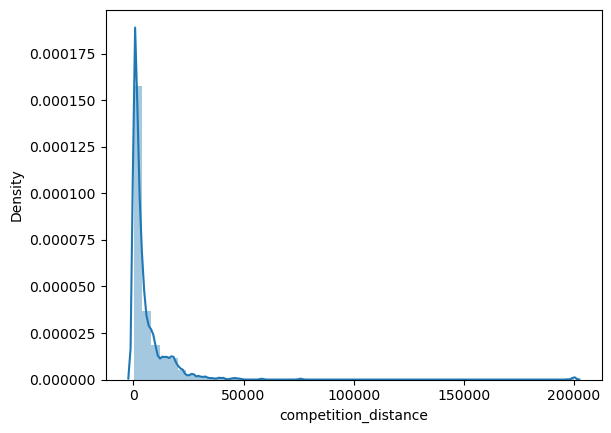

In [31]:
sns.distplot(df1['competition_distance'])

##### 1.7.2. Categorical Atributtes

In [45]:
# metodo que ve os valores unicos de cada uma das categorias
cat_atributtes.apply(lambda x:x.unique().shape[0])

state_holiday      4
store_type         4
assortment         3
promo_interval     4
month_map         12
dtype: int64

<Axes: xlabel='state_holiday', ylabel='sales'>

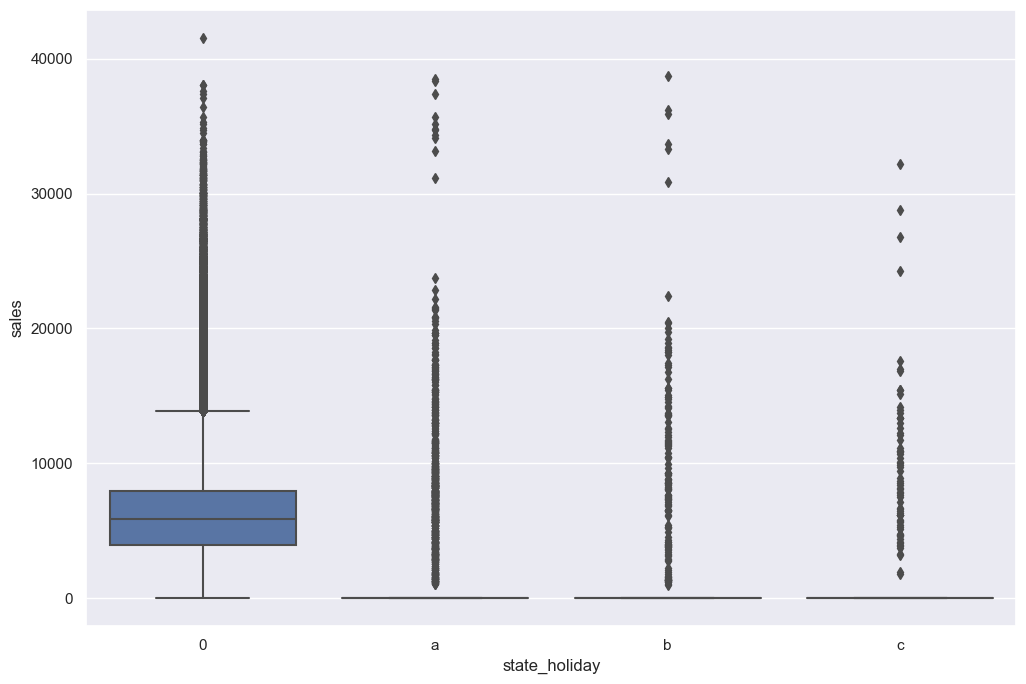

In [67]:
# Boxplot para analisar as variaveis categoricas
sns.boxplot(x='state_holiday',y='sales',data=df1)

<Axes: xlabel='assortment', ylabel='sales'>

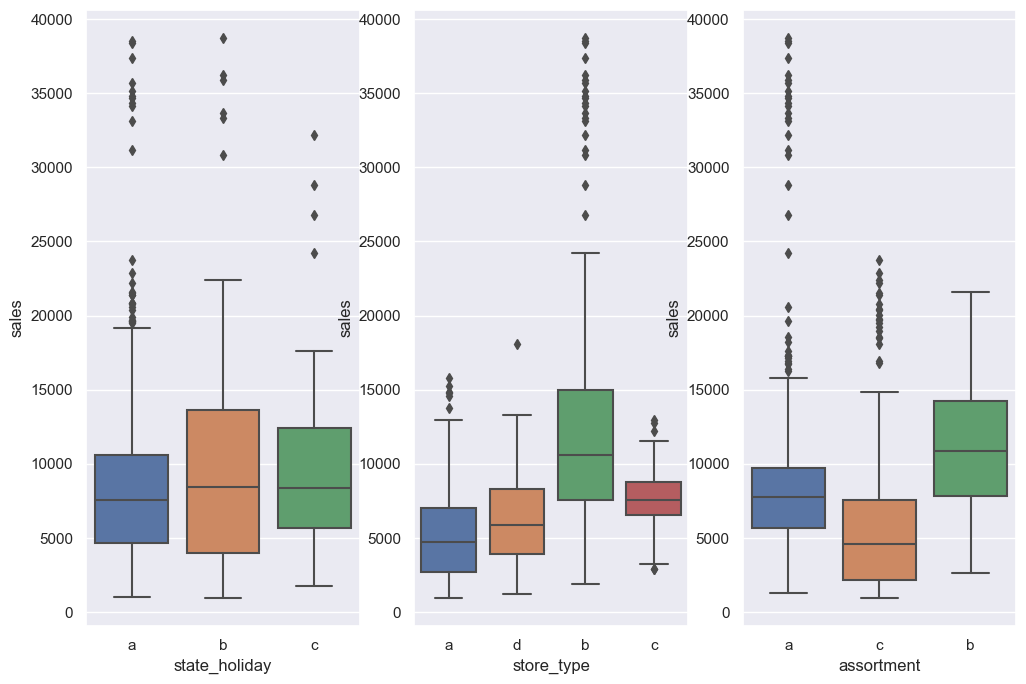

In [64]:
# Para melhora a visualização, foi removido dos dias quando as lojas estavam fechadas
aux1 = df1[(df1['state_holiday'] != '0') & (df1['sales'] > 0)]

plt.subplot(1,3,1)
sns.boxplot(x='state_holiday',y='sales',data=aux1)

plt.subplot(1,3,2)
sns.boxplot(x='store_type',y='sales',data=aux1)

plt.subplot(1,3,3)
sns.boxplot(x='assortment',y='sales',data=aux1)